In [2]:
!pip install Tokenterminal
from tokenterminal import TokenTerminal
token_terminal = TokenTerminal(key='6c37f0ff-5c2b-4564-8286-3bccf6e42fd2')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
!cp /content/drive/MyDrive/Colab\ Notebooks/TokenTerminal_Functions.py /content

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import TokenTerminal_Functions as tt

In [4]:
# Fetch project's historical metrics

data = token_terminal.get_historical_metrics('algorand')

In [ ]:
data

In [6]:
# metrics from TokenTerminal

PRICE = tt.get_price(data)
MCAP = tt.get_mcap(data)
MARKET_CAP_CIRCULATING = tt.get_mcap_circ(data)
MARKET_CAP_FULLY_DILUTED = tt.get_mcap_fully_diluted(data)
VOLUME = tt.get_volume(data)
VOL_MC = tt.get_vol_mc(data)
PE_CIRCULATING = tt.get_pe_circ(data)
PE = tt.get_pe(data)
PS_CIRCULATING = tt.get_ps_circ(data)
PS = tt.get_ps(data)
TVL = tt.get_tvl(data)
GMV = tt.get_gmv(data)
REVENUE = tt.get_revenue(data)
REVENUE_SUPPLY_SIDE = tt.get_revenue_ss(data)
REVENUE_PROTOCOL = tt.get_revenue_p(data)

In [8]:
# Calculate daily return

PRICE['RETURN'] = (PRICE['PRICE']/PRICE['PRICE'].shift(1)) - 1

In [9]:
PRICE['PCT_CHANGE'] = PRICE['PRICE'].pct_change(1)

In [11]:
# Calculate daily average return base on last 30 days

Daily_avg_return = np.average(PRICE['2022-09-11':'2022-10-11']['PCT_CHANGE'])

In [12]:
Daily_avg_return*100

0.04272036406253177

In [13]:
PRICE['PCT_CHANGE_7DAYS'] = PRICE['PRICE'].pct_change(7)

In [14]:
# Calculate weekly average return base on last 365 days

Weekly_avg_return = np.average(PRICE['2021-10-02':'2022-10-02']['PCT_CHANGE_7DAYS'])

In [15]:
Weekly_avg_return*100

-2.1534993925220935

In [16]:
PRICE['PCT_CHANGE_30DAYS'] = PRICE['PRICE'].pct_change(30)

In [17]:
PRICE['PCT_CHANGE_90DAYS'] = PRICE['PRICE'].pct_change(90)

In [18]:
PRICE['PCT_CHANGE_365DAYS'] = PRICE['PRICE'].pct_change(365)

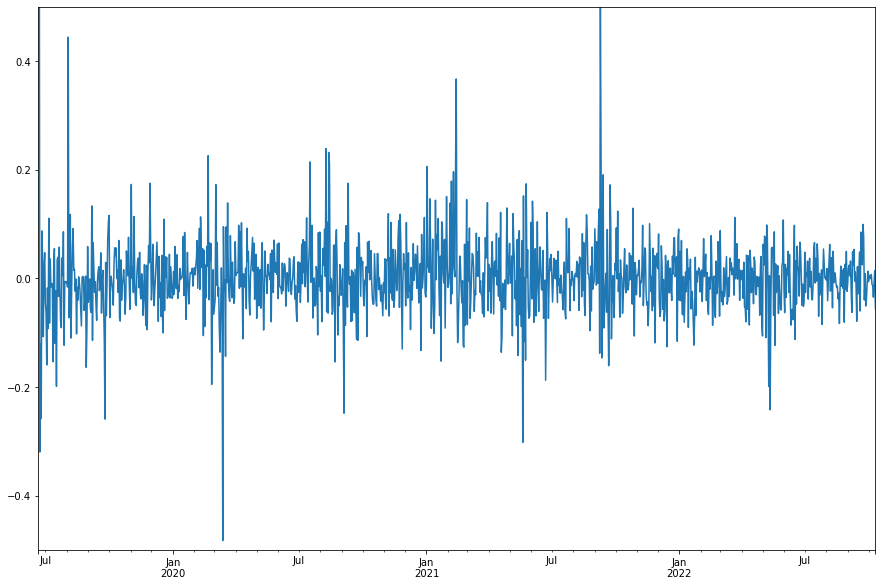

In [20]:
# Ploting daily return

PRICE['RETURN'].plot(figsize=(15,10),ylim=(-0.5,0.5))

In [21]:
# Annual return based on daily return

Ann_return_d = pow((1+PRICE.iloc[-1,2]),365)-1
print('Annualized return based on day return:',Ann_return_d)

Ann_return_w = pow((1+PRICE.iloc[-1,3]),52)-1
print('Annualized return based on week return:',Ann_return_w)

Ann_return_m = pow((1+PRICE.iloc[-1,4]),12)-1
print('Annualized return based on month return:',Ann_return_m)

Ann_return_q = pow((1+PRICE.iloc[-1,5]),12)-1
print('Annualized return based on quartal return:',Ann_return_q)

Annualized return based on day return: -0.9999999992896522
Annualized return based on week return: -0.995441704484917
Annualized return based on month return: -0.07338149028890284
Annualized return based on quartal return: 1.8157131040621493


In [22]:
print(PRICE.iloc[-1,3])

-0.09847666864004445


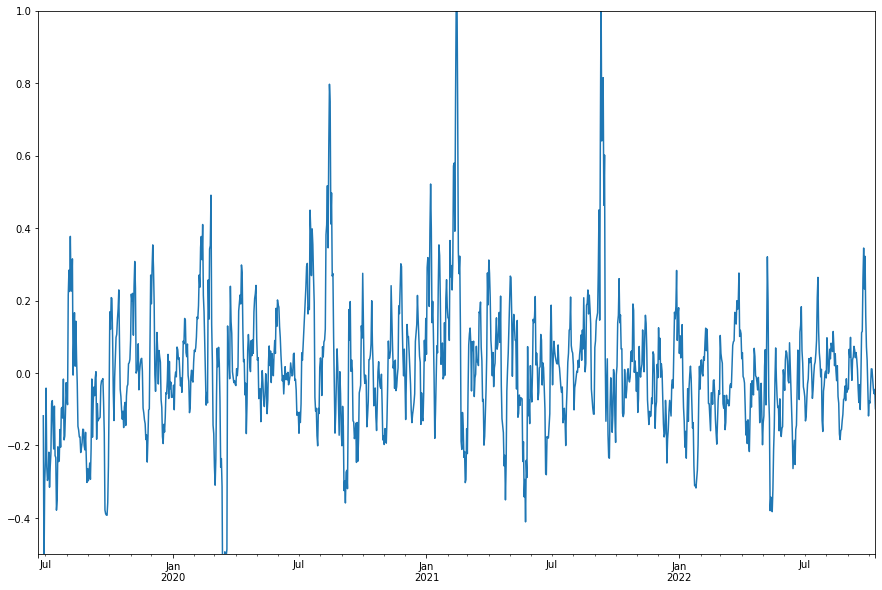

In [23]:
# Ploting weekly return 

PRICE['PCT_CHANGE_7DAYS'].plot(figsize=(15,10),ylim = (-0.5,1))

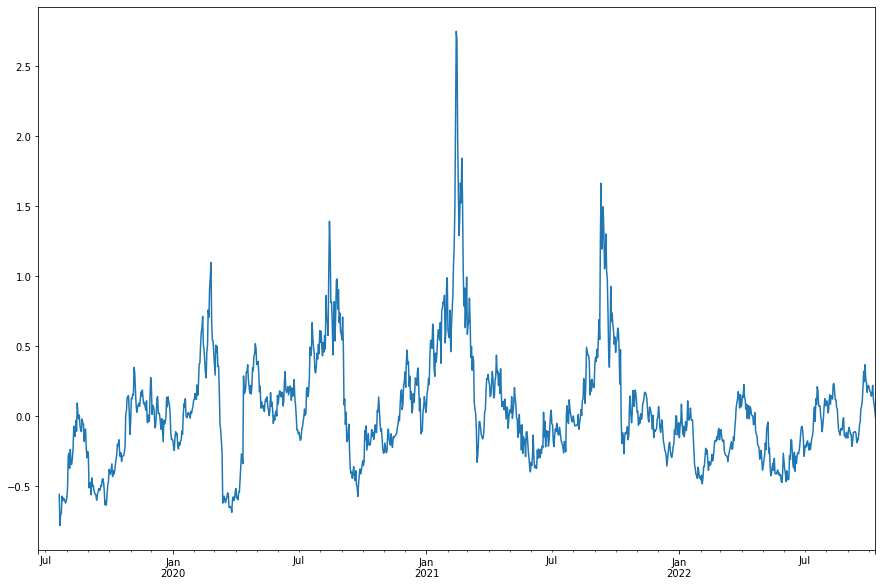

In [24]:
# Ploting weekly return

PRICE['PCT_CHANGE_30DAYS'].plot(figsize=(15,10))

In [25]:
# Calculate daily average volume base on last 30 days

Daily_avg_volume = np.average(VOLUME['2022-09-10':'2022-10-10'])

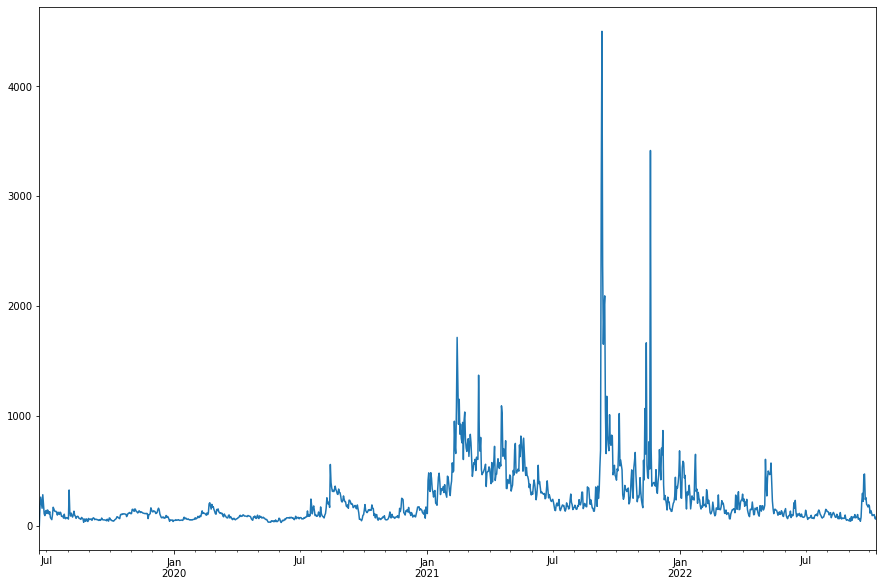

In [26]:
# Ploting daily volume in millions

(VOLUME['VOLUME']/1e6).plot(figsize=(15,10))

In [27]:
Daily_avg_volume

150335649.70793763

In [28]:
Annualized_volume = Daily_avg_volume*365

In [29]:
Annualized_volume

54872512143.39723

In [30]:
# Import data (fees) last 30 days

fee_ = pd.read_csv('/content/Daily Fees In The Past 30 Days. 2022-10-12 algorand.csv')

In [31]:
# Ploting daily fee last 30 days 

fee_['Date'] = pd.to_datetime(fee_['Date'])

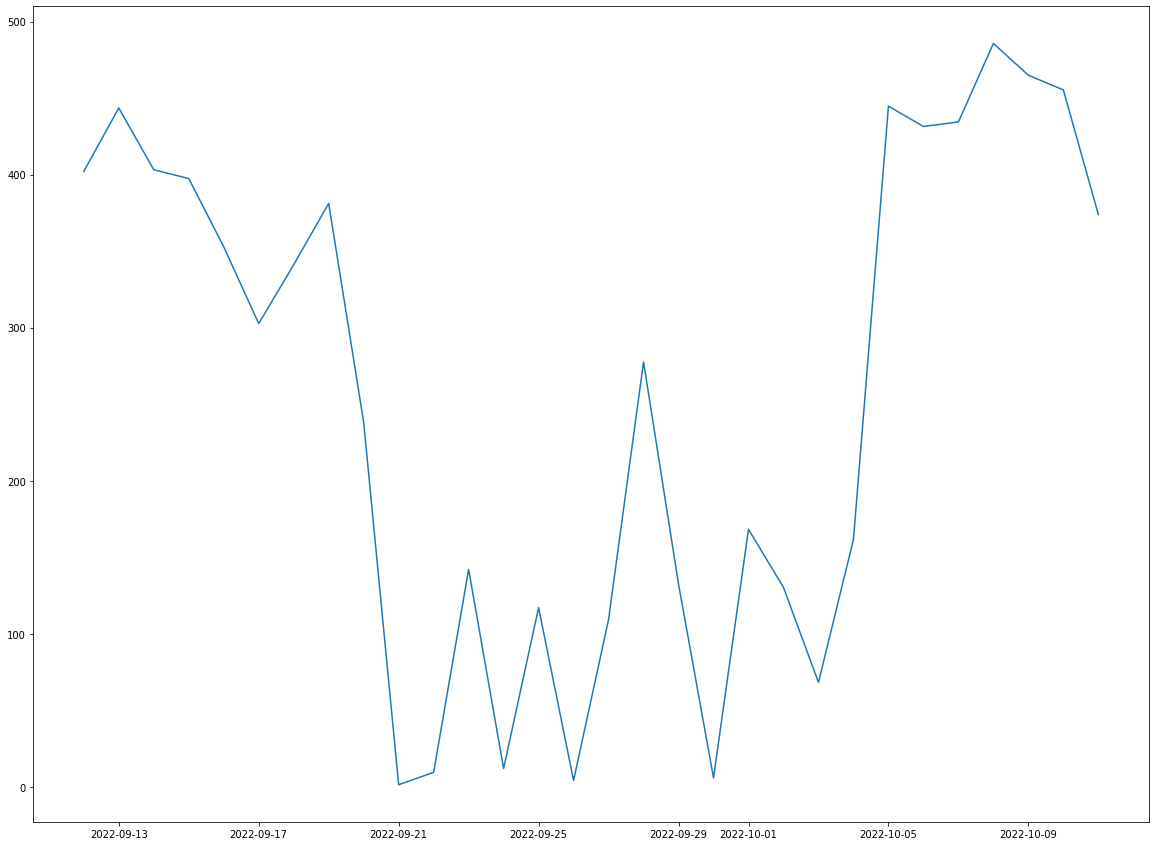

In [32]:
plt.figure(figsize=(20, 15))
plt.plot(fee_['Date'], fee_['Fees ($)'])
plt.show()

In [33]:
# Daily average fees based on last 30 days

Daily_avg_fee = np.average(fee_['Fees ($)'])

In [34]:
Daily_avg_fee

256.4283333333332

In [35]:
# Annualized fee

Annualized_fee = Daily_avg_fee*365

In [36]:
Annualized_fee

93596.34166666663

In [37]:
TVL

,tvl


**FEE = REVENUE FOR Algorand**

In [39]:
# TVL in millions

TVL_ = TVL/1e6

In [3]:
TVL_ = 237.52

In [ ]:
first = TVL.iloc[-1,0]
second = TVL.iloc[522,0]
# Turnover TVL last 30 days

TVL_30days_turnover = first/second

In [1]:
TVL_30days_turnover = 237520000/229500000

In [2]:
TVL_30days_turnover

1.0349455337690632

In [41]:
# Annulized volatility

Price_ = PRICE['2022-01-01':'2022-10-05']['PRICE']
Price_chg = (np.log(Price_) - np.log(Price_.shift(1)))[1:]
vol_ = np.std(Price_chg)
ann_vol_ = vol_*np.sqrt(365)

In [42]:
ann_vol_

0.9590339844420717

In [ ]:
# Fully diluted Market

FD_MC_ = MARKET_CAP_FULLY_DILUTED.iloc[-1,0]
print('FD_MC_=',FD_MC_)

# Circulated Market

C_MC_ = MARKET_CAP_CIRCULATING.iloc[-1,0]
print('C_MC_=',C_MC_)

# Ratio MarketCap/Annulized fee

MC_AF = C_MC_/Annualized_fee
print('MC_AF=',MC_AF)

# Ratio MarketCap/Annulized revenue

MC_AR = C_MC_/Annualized_fee
print('MC_AR=',MC_AR)

# Ratio Fully Diluted Market Cap/Annulized fee

FD_AF = FD_MC_/Annualized_fee
print('FD_AF=',FD_AF)

# Ratio Fully Diluted Market Cap/Annulized revenue

FD_AR = FD_MC_/Annualized_fee
print('FD_AR=',FD_AR)

# Ratio MarketCap/TVL

MC_TVL =C_MC_/TVL.iloc[-1,0]
print('MC_TVL=',MC_TVL)

# Ratio  Fully Diluted MarketCap/TVL

MC_FD_TVL =FD_MC_/TVL.iloc[-1,0]
print('MC_FD_TVL=',MC_FD_TVL)

# % circullated supply

CS = C_MC_/FD_MC_
print('circullated supply=',CS)